# Part02. Exploratory Data Analysis

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
!apt-get update -qq
!apt-get install -y -qq fonts-nanum fonts-noto-cjk
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/share/fonts/truetype: skipping, looped director

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib


In [74]:
import os
import matplotlib as mpl

import matplotlib.font_manager as fm

# 1) 코랩에 실제 존재하는 한글 폰트 파일 경로를 찾기 (우선순위대로)
candidates = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
    "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
    "/usr/share/fonts/opentype/noto/NotoSansCJKkr-Regular.otf",
]

font_path = next((p for p in candidates if os.path.exists(p)), None)
print("✅ using font_path:", font_path)

# 2) matplotlib 폰트 매니저에 강제 등록
if font_path is None:
    raise FileNotFoundError("한글 폰트 파일을 못 찾았어. /usr/share/fonts 아래 폰트 목록을 확인해야 함.")

fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
print("✅ registered font_name:", font_name)

# 3) matplotlib 기본 폰트로 고정
mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False


✅ using font_path: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
✅ registered font_name: NanumGothic


In [75]:
df = pd.read_csv('/content/drive/MyDrive/week_hands_on_project5/bank_churn/dataset/bankchurn_processed.csv')
df.columns = df.columns.str.lower()
print(df.shape)
display(df.head())
display(df.describe())

# 수치형 변수 <> 범주형 변수 구분
df_outliers = df[[col for col in df.columns if df[col].dtype != 'bool']]
num_cols = []
cat_cols = []
for col in df_outliers.columns:
  if df_outliers[col].dtype == 'object':
    cat_cols.append(col)
  else:
    num_cols.append(col)

(10127, 59)


,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,flag_high_credit_limit,flag_new_customer,flag_high_inactive,flag_high_active,flag_high_contact,flag_no_contact,flag_low_open_to_buy,flag_high_open_to_buy,flag_amt_drop,flag_amt_spike,flag_no_chng,flag_low_spender,flag_high_spender,flag_low_trans,flag_high_trans,flag_ct_drop,flag_ct_spike,flag_ct_zero,flag_low_util,flag_high_util,util_z,trans_ct_z,amt_z,_risk_score,_monthly_contact_rate,_inactive_ratio_12m,_relationship_intensity,_avg_monthly_txn_ct,education_level_encoded,is_edu_unknown,income_category_encoded,is_income_unknown,is_married,is_single,is_divorced,is_marital_unknown,card_gold,card_platinum,card_silver
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,-0.775882,-0.973895,-0.959707,1.157720,0.250000,0.083333,0.128205,1.076923,1.0,False,2.0,False,True,False,False,False,False,False,False
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,-0.616276,-1.357340,-0.916433,1.657497,0.166667,0.083333,0.136364,0.750000,3.0,False,0.0,False,False,True,False,False,False,False,False
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.997155,-1.911206,-0.740982,1.655032,0.000000,0.083333,0.111111,0.555556,3.0,False,3.0,False,True,False,False,False,False,False,False
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1.759686,-1.911206,-0.951758,4.622650,0.083333,0.333333,0.088235,0.588235,1.0,False,0.0,False,False,False,False,True,False,False,False
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.997155,-1.570365,-1.056263,1.629474,0.000000,0.083333,0.238095,1.333333,0.0,False,2.0,False,True,False,False,False,False,False,False


,attrition_flag,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,flag_high_credit_limit,flag_new_customer,flag_high_inactive,flag_high_active,flag_high_contact,flag_no_contact,flag_low_open_to_buy,flag_high_open_to_buy,flag_amt_drop,flag_amt_spike,flag_no_chng,flag_low_spender,flag_high_spender,flag_low_trans,flag_high_trans,flag_ct_drop,flag_ct_spike,flag_ct_zero,flag_low_util,flag_high_util,util_z,trans_ct_z,amt_z,_risk_score,_monthly_contact_rate,_inactive_ratio_12m,_relationship_intensity,_avg_monthly_txn_ct,education_level_encoded,income_category_encoded
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,8608.000000,9015.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.100030,0.030512,0.072776,0.002864,0.022712,0.039400,0.193345,0.115236,0.406339,0.010763,0.000494,0.319246,0.074751,0.245087,0.067838,0.277279,0.007998,0.000691,0.397946,0.010961,-4.490445e-17,-2.245222e-16,-1.347133e-16,1.796178e-16,0.204610,0.195097,0.113027,1.923120,2.061106,1.342984
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.300054,0.172001,0.259781,0.053439,0.148990,0.194553,0.394940,0.319323,0.491174,0.103192,0.022216,0.466207,0.263002,0.430160,0.251481,0.447677,0.089080,0.026283,0.489498,0.104124,1.000049e+00,1.000049e+00,1.000049e+00,2.185234e+00,0.092185,0.084219,0.058911,0.911977,1.412810,1.356455
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.971550e-01,-2.337256e+00,-1.146344e+00,-7.196649e+00,0.000000,0.000000,0.017857,0.188679,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.137243e-01,-8.460801e-01,-6.619405e-01,-1.095992e+00,0.166667,0.166667,0.073171,1.272727,1.000000,0.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.587287e-01,9.123036e-02,-1.486877e-01,3.104318e-01,0.166667,0.166667,0.108108,1.857143,2.000000,1.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,8.274384e-01,6.877007e-01,9.918090e-02,1.395166e+00,0.250000,0.250000,0.142857,2.361111,3.000000,3.

변수 분류

a. Demographic / 구조적 배경 (Why this customer)

    customer_age
    gender
    dependent_count
    education_level_encoded
    income_category_encoded
    marital_status (is_*)
    card_category (card_*)
    months_on_book
    total_relationship_count


b. Value / Financial Capacity (How valuable structurally)

    credit_limit
    avg_open_to_buy
    total_revolving_bal
    avg_utilization_ratio
    flag_high_credit_limit
    flag_low_open_to_buy
    flag_high_open_to_buy
    flag_low_util
    flag_high_util


c. Transaction Behavior (What they do)

    total_trans_ct
    total_trans_amt
    total_amt_chng_q4_q1
    total_ct_chng_q4_q1
    flag_low_trans
    flag_high_trans
    flag_ct_drop
    flag_ct_spike
    flag_ct_zero
    flag_low_spender
    flag_high_spender

d. Engagement / Contact (How bank interacts)

    contacts_count_12_mon
    _monthly_contact_rate
    flag_high_contact
    flag_no_contact


e.  Risk & Stability

    months_inactive_12_mon
    _inactive_ratio_12m
    flag_high_inactive
    _risk_score


#  ⒈ Overview


---



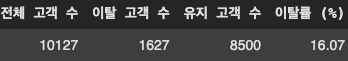

In [76]:
# 전체 고객 | 이탈 고객 | 유지 고객 | 이탈률
total_customers = len(df)
churned_customers = len(df[df['attrition_flag'] == 1])
retained_customers = len(df[df['attrition_flag'] == 0])
churn_rate = (churned_customers / total_customers) * 100

# metrics
summary = pd.DataFrame({
    '전체 고객 수': [total_customers],
    '이탈 고객 수': [churned_customers],
    '유지 고객 수': [retained_customers],
    '이탈률 (%)': [round(churn_rate, 2)]

})

display(summary)

#신규고객비율 (가입기준 <20 개월 미만으로 정의)
print("\n\n\n⏺신규고객의 이탈률은 ?")
new_customers = len(df[df['flag_new_customer'] == 1])
new_rate = new_customers / total_customers * 100
print(f"\n신규고객비율 : {new_rate:.2f}%")

new_churn_rate = (
    df.loc[df['flag_new_customer'] == 1, 'attrition_flag']
    .mean()
    * 100
)

print(f"신규고객 이탈률 : {new_churn_rate:.2f}%")

print("\n\n\n⏺유지고객의 이탈률은 ?")
old_churn_rate = (
    df.loc[df['flag_new_customer'] == 0, 'attrition_flag']
    .mean()
    * 100
)

print(f"유지고객 이탈률 : {old_churn_rate:.2f}%")

,전체 고객 수,이탈 고객 수,유지 고객 수,이탈률 (%)
0,10127,1627,8500,16.07





⏺신규고객의 이탈률은 ?

신규고객비율 : 3.05%
신규고객 이탈률 : 13.92%



⏺유지고객의 이탈률은 ?
유지고객 이탈률 : 16.13%


➡
신규 고객은 전체 고객의 3.05%에 불과하며,
이탈률 또한 13.92%로 전체 평균(16.07%)보다 낮게 나타났다.

이는 이탈이 신규 유입의 문제라기보다,
기존 고객의 이용 패턴 변화에서 기인함을 시사

#  ⒉ Distribution


---



✅ Summary

    Distribution 분석 결과, churn은
    단일 demographic 특성이나 개별 지표에 의해 설명되기보다,
    고객의 가치(Value) | 활동(Activity)| 관계(Relationship)가
    불균형해지는 상태에서 강화되는 경향을 보였다.

    특히
    High-Value + Low-Activity 고객군,
    최근 사용량 급감,
    극단적 행동/위험군에 대해 별도로 확인할 필요합니다.

##이탈 고객 vs 유지 고객 기본 분포

In [77]:

TARGET = "attrition_flag"

def churn_rate(s):
    return s.mean()

def churn_table(df, group_col, normalize=False):
    # group별 size, churn rate, churned count
    g = df.groupby(group_col)[TARGET].agg(
        n="count",
        churn_rate="mean",
        churned="sum"
    ).sort_values("churn_rate", ascending=False)
    if normalize:
        g["share_of_total"] = g["n"] / len(df)
        g["share_of_churned"] = g["churned"] / df[TARGET].sum()
    return g

def plot_churn_bar(tbl, title="", topn=None):
    data = tbl.copy()
    if topn is not None:
        data = data.head(topn)
    ax = data["churn_rate"].plot(kind="bar", figsize=(10,4))
    plt.title(title)
    plt.ylabel("Churn rate")
    plt.ylim(0, min(1, data["churn_rate"].max()*1.2))
    plt.xticks(rotation=45, ha="right")
    plt.show()

### 범주형

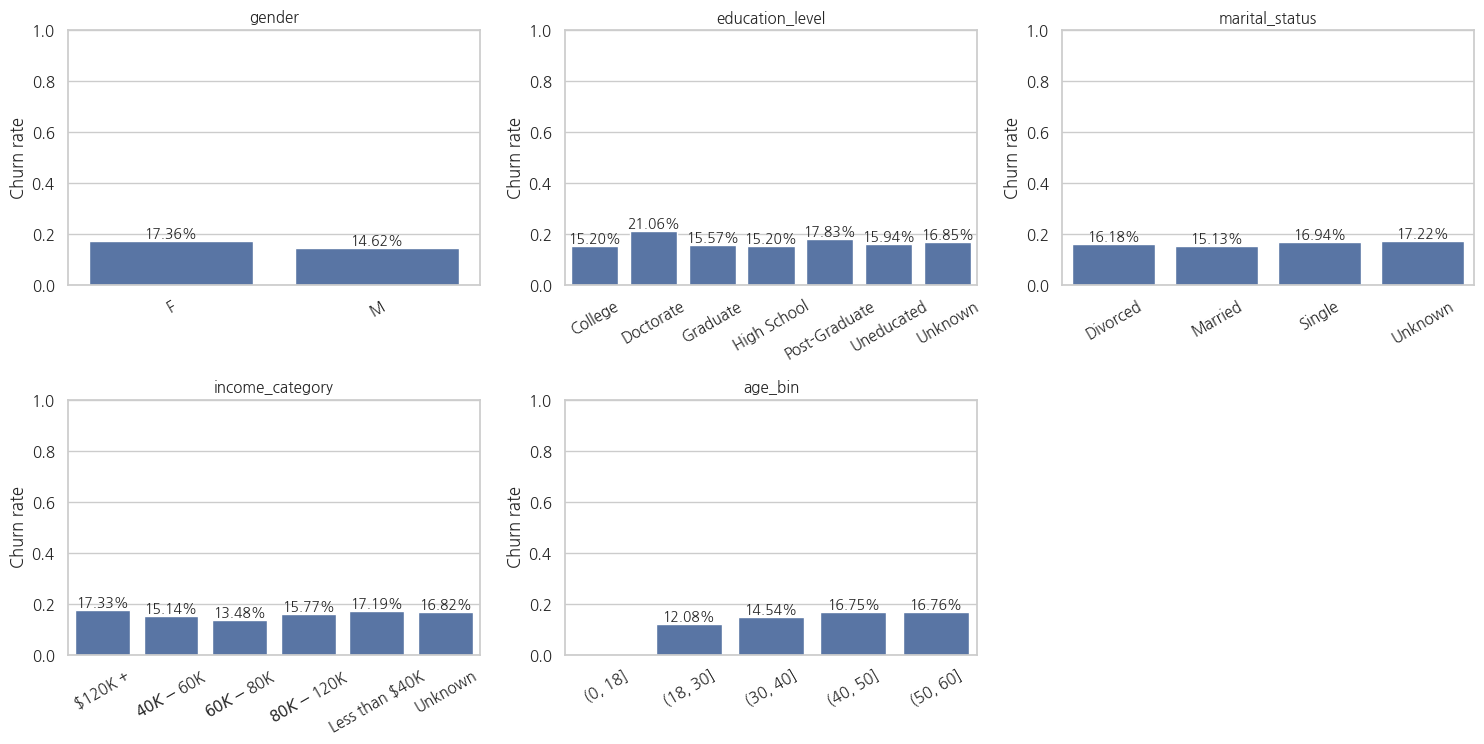

In [78]:
import math

df['age_bin'] = pd.cut(df['customer_age'], bins=[0,18,30,40,50,60])
demographics = [
    "gender",
    "education_level",
    "marital_status",
    "income_category",
    "age_bin"
]


def plot_categorical_by_attrition(df, cat_cols, target_col="attrition_flag", ncols=3):
    n = len(cat_cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.8*nrows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        ax = axes[i]

        # 카테고리별 churn rate 계산
        tmp = (
            df.groupby(col)[target_col]
              .mean()
              .reset_index(name="churn_rate")
        )

        sns.barplot(data=tmp, x=col, y="churn_rate", ax=ax)

        # Label formatting: percent or decimal 선택 가능 (percent가 보기 좋음)
        for p in ax.patches:
            val = p.get_height()
            ax.annotate(f"{val:.2%}",
                        (p.get_x() + p.get_width()/2, val),
                        ha='center', va='bottom', fontsize=10)

        ax.set_title(col, fontsize=11)
        ax.set_ylabel("Churn rate")
        ax.set_xlabel("")
        ax.set_ylim(0, 1)        # churn이 확률이라 0~1 범위 유지
        ax.tick_params(axis="x", rotation=30)

    # 남는 축 숨기기
    for j in range(n, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

plot_categorical_by_attrition(df, demographics, target_col="attrition_flag", ncols=3)

	1.	**Gender**
      •	Churn gap 약 3%p 수준 존재
      •	다만 성별 단독으로는 명확한 churn driver라고 보기 어려움
	2.	**Education Level**
      •	Doctorate / Post-graduate 고객군에서 상대적으로 높은 churn 관찰
      •	고학력 고객일수록 High Value 고객 비중이 높을 가능성 (고소득·고한도·관계 깊이와 연관 가능)
      •	해당 그룹이 churn 되면 비용 손실 리스크가 큼 → 고가치 churn 위험군
	3.	**Marital Status**
      •	Single / Unknown 그룹에서 churn이 다소 높으나 차이는 제한적
      •	관계 기반 상품(relationship banking) 특성과의 연관 가능성 있으나 단독 driver로는 약함
	4.	**Income Category**
      •	대부분 Baseline 근처 분포
      •	다만 <40k 저소득, >120k 고소득 양극단에서 churn이 경미하게 상승
      •	저소득: 비용 민감 / High Util / Inactive 가능성
      •	고소득: High Value / Multi-product / 수익 기반 고객 → churn 시 손실 큼
	5.	**Age Bins**
      •	40대 이상 고객군에서 churn이 baseline 대비 확연히 증가
      •	중장년층이 inactivity 패턴을 보일 가능성 (거래 감소 / 관계 약화 / low engagement)

### 수치형

수치형 변수의 분포는

타깃 변수와 상관관계 확인 후 (corr >= 0.2) 주요 변수에 대해서만 분포를 확인했습니다.

In [79]:
## 수치형 변수 이탈과의 상관관계 확인
# numerical values
from scipy.stats import pointbiserialr

target_col = 'attrition_flag'
numeric_cols_corr = df.select_dtypes(include=['number']).drop(columns=[target_col]).columns

results_corr = []
for col in numeric_cols_corr:
  corr, p = pointbiserialr(df[target_col],df[col])
  results_corr.append({'feature':col,
                       'corr':corr,
                       'p-value':round(p,10)})

corr_df = pd.DataFrame(results_corr)
corr_df.sort_values('corr', ascending=False)

,feature,corr,p-value
29,flag_ct_drop,0.333306,0.000000e+00
27,flag_low_trans,0.317731,0.000000e+00
25,flag_low_spender,0.274328,0.000000e+00
32,flag_low_util,0.231034,0.000000e+00
5,contacts_count_12_mon,0.204491,0.000000e+00
38,_monthly_contact_rate,0.204491,0.000000e+00
37,_risk_score,0.165478,0.000000e+00
39,_inactive_ratio_12m,0.152449,0.000000e+00
4,months_inactive_12_mon,0.152449,0.000000e+00
18,flag_high_contact,0.137262,0.000000e+00


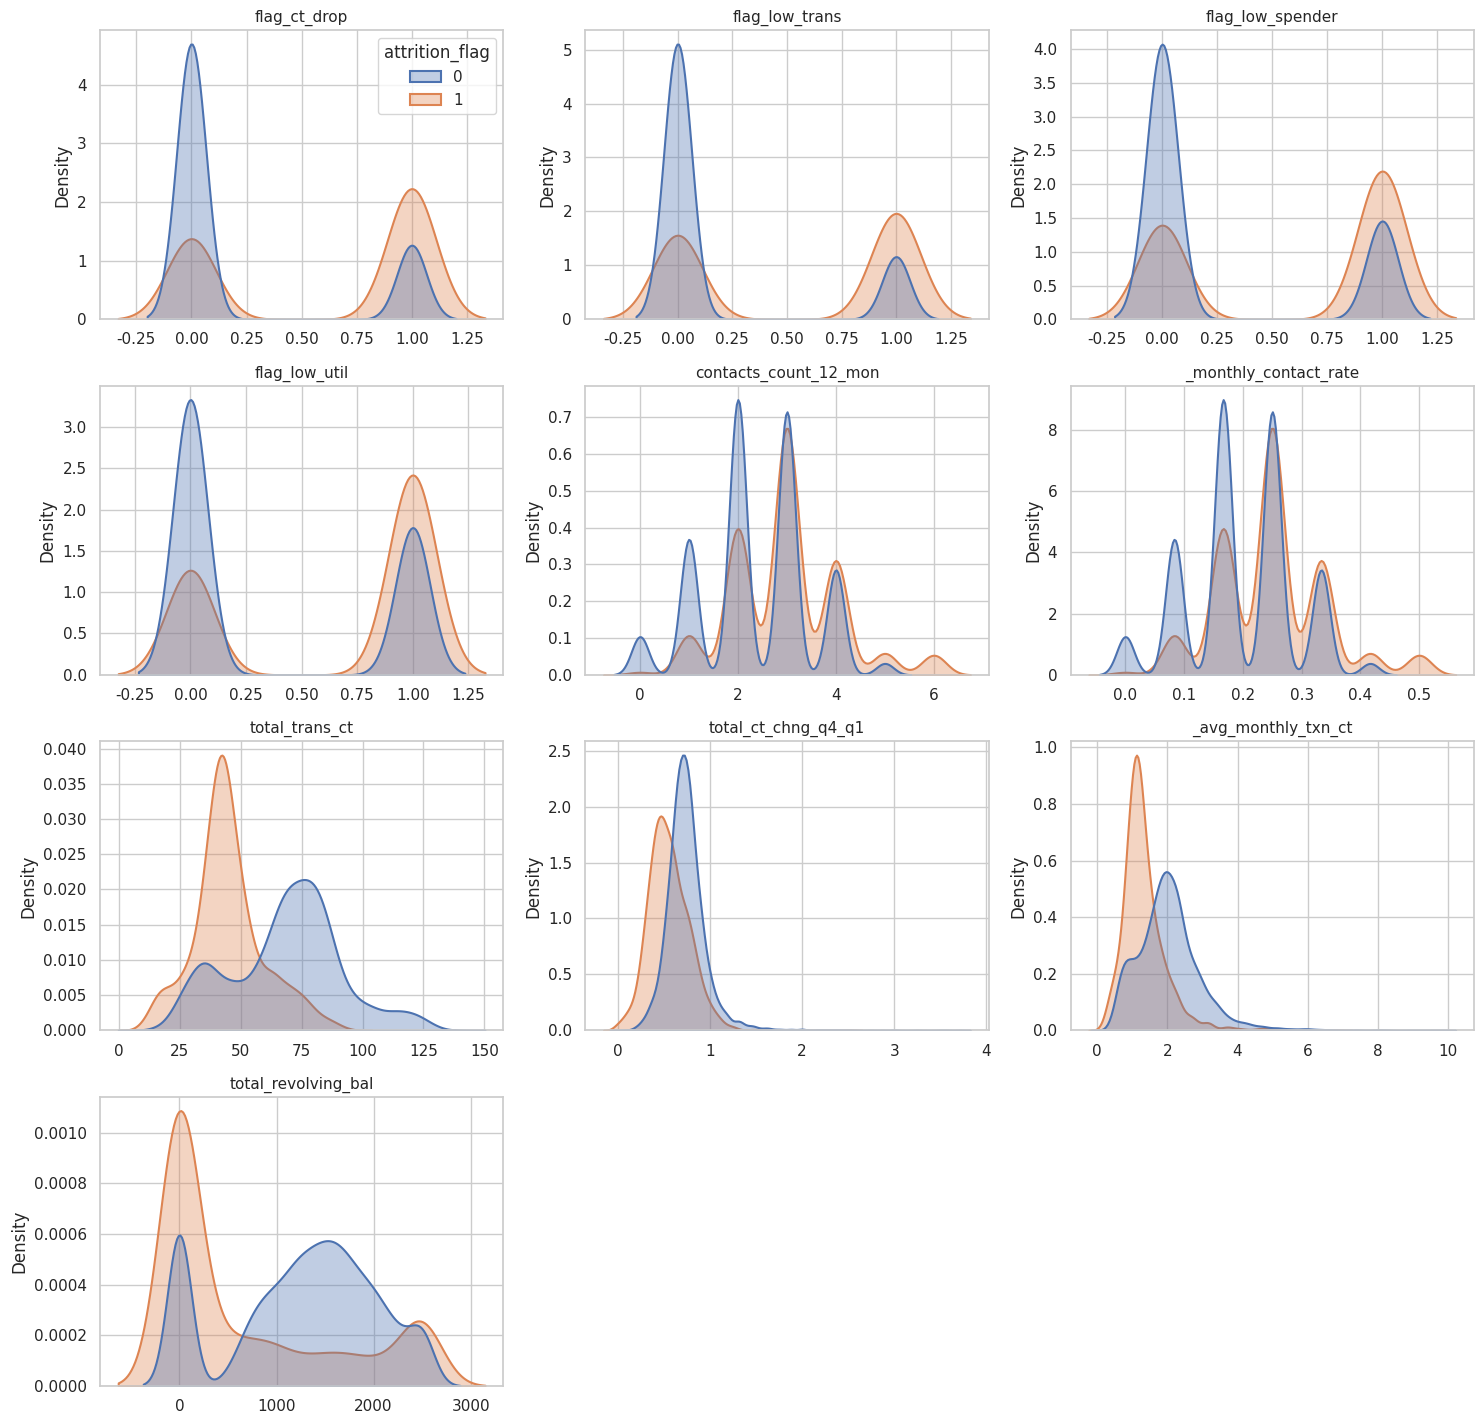

In [80]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# =====================
# 1) 연속형 분포 시각화
# =====================
def plot_numeric_by_attrition(df, numeric_cols, target_col="attrition_flag",
                              ncols=3, kind="kde", bins=30, bw_adjust=1.0):
    n = len(numeric_cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.6*nrows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        if kind == "kde":
            sns.kdeplot(
                data=df, x=col, hue=target_col,
                fill=True, common_norm=False, alpha=0.35, linewidth=1.5,
                bw_adjust=bw_adjust, ax=ax
            )
            ax.set_ylabel("Density")
        elif kind == "hist":
            sns.histplot(
                data=df, x=col, hue=target_col,
                stat="density", multiple="layer", bins=bins, alpha=0.45,
                ax=ax
            )
            ax.set_ylabel("Density")
        ax.set_title(col, fontsize=11)
        ax.set_xlabel("")
        if i != 0:
            leg = ax.get_legend()
            if leg: leg.remove()

    # 남는 축 숨기기
    for j in range(n, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

num_cols_dist = ['flag_ct_drop', 'flag_low_trans', 'flag_low_spender','flag_low_util',
                 'contacts_count_12_mon','_monthly_contact_rate',
                 'total_trans_ct', 'total_ct_chng_q4_q1', '_avg_monthly_txn_ct','total_revolving_bal'
                 ]
plot_numeric_by_attrition(df, num_cols_dist, target_col="attrition_flag",
                              ncols=3, kind="kde", bins=30, bw_adjust=1.0)

1. 이탈 고객은 유지 고객 대비 거래 횟수와 월평균 거래 빈도가 전반적으로 낮았으며,
특히 최근 분기(Q4→Q1) 기준 사용량 감소가 뚜렷하게 관찰되었다.

2. 접촉 횟수는 ‘적을수록 이탈’로 단순 해석되지 않았다.
이탈 고객은 오히려 상대적으로 접촉 빈도가 높은 구간에서도 다수 관찰되었으며,
이는 접촉이 관계의 깊이라기보다
문제 발생·불만·해지 직전 상담 등 ‘사후적 반응(contact as signal)’일 가능성을 시사한다.

3. 일부 이탈 고객은 보유 잔액 또는 신용 여력이 존재함에도
실제 사용률은 낮은 상태를 유지할 수 있어 보인다. 가치 대비 비활성 고객의 이탈이 함께 존재할 수 있다.

## 극단 행동 고객






### 이상치

In [81]:
# 이상치 수치 확인
def detect_outliers_iqr(df, features):
  outlier_summary = []

  for col in features:
    if not pd.api.types.is_numeric_dtype(df[col]):
      continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[ (df[col]<lower_bound) | (df[col]>upper_bound)]

    n_outliers = len(outliers)
    percent_of_outliers = ( n_outliers / len(df)) * 100

    outlier_summary.append({
        'feature': col,
        'n_outliers': n_outliers,
        'percent_of_outliers %': round(percent_of_outliers, 3),
        'lower_bound' : round(lower_bound , 3),
        'upper_bound' : round(upper_bound , 3)
    })
  return pd.DataFrame(outlier_summary).sort_values('percent_of_outliers %',ascending=False)


num_cols_outlier = [col for col in num_cols if not col.startswith('flag') and col != 'attrition_flag']
outlier_df = detect_outliers_iqr(df_outliers, num_cols_outlier)
display(outlier_df[outlier_df['n_outliers']>0])




### viz ####
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sections = {
    "1) Financial / Value (극단 한도·여력·소비)": [
        "credit_limit",
        "avg_open_to_buy",
        "total_trans_amt"
    ],
    "2) Activity / Relationship": [
        "contacts_count_12_mon",
        "_avg_monthly_txn_ct",
        "_relationship_intensity"
    ],
    "3) Risk / Tenure / Inactivity (위험·비활성 극단)": [
        "_risk_score",
        "months_inactive_12_mon",
        "_inactive_ratio_12m"
    ]
}

for section_title, cols in sections.items():

    fig = make_subplots(
        rows=1,
        cols=3,
        subplot_titles=cols
    )

    for i, col in enumerate(cols, start=1):
        fig.add_trace(
            go.Box(
                y=df[col],
                name=col,
                boxpoints="outliers",
                marker=dict(color="steelblue")
            ),
            row=1,
            col=i
        )

    fig.update_layout(
        title=f"<b>{section_title}</b>",
        height=420,
        margin=dict(t=70),
        showlegend=False
    )

    fig.show()

,feature,n_outliers,percent_of_outliers %,lower_bound,upper_bound
6,credit_limit,984,9.717,-10213.750,23836.250
8,avg_open_to_buy,963,9.509,-11477.250,22660.750
10,total_trans_amt,896,8.848,-1722.750,8619.250
16,amt_z,896,8.848,-1.804,1.241
18,_monthly_contact_rate,629,6.211,0.042,0.375
5,contacts_count_12_mon,629,6.211,0.500,4.500
17,_risk_score,553,5.461,-4.833,5.132
9,total_amt_chng_q4_q1,396,3.910,0.289,1.201
12,total_ct_chng_q4_q1,394,3.891,0.228,1.172
2,months_on_book,386,3.812,17.500,53.500


1. 상위 3개 금융 여력 + 소비 규모 변수

        신용 한도(credit_limit), 한도 대비 사용 여력(avg_open_to_buy), 12개월 소비량(total_trans_amt)

        < 해석 >
          극단 소비/극단 한도 고객이 전체 고객 중 9~10% 존재
          → revenue high-value 고객 세그먼트가 확실히 존재 가능
          (revenue impact 큰 고객들)

2. 행동빈도 변수

          contacts_count_12_mon

            고객 relationship 양극단으로 갈리지는 신호 확인
            이 변수는 상단 극단보다 하단 극단(0회) 도 의미 있음
            즉, “아예 관계 없는 고객” vs “접촉이 잦은 고객” 양극단

      
          _avg_monthly_txn_ct

            중앙부는 1-2회 수준이며 활동성 기준으로 평균 고객과 다른행동 패턴이 보이는 고활동 고객군이 존재.

          _relationship_intensity
             
             관계강도 역시 이산적인 high group이 존재. 평균고객과 구분되는 고강도 관계 고객군이 관측됨.


          months_inactive_12_mon

             대부분 고객은 제한적인 비활성 기간을 보이나, 장기간 비활성 고객이 극단부에 집중되어 존재

          _inactive_ratio_12m

            단순 개월 수가 아니라 비활성 비율로 환산해도 동일한 구조이며
            비활성 비율 기준으로도 장기 비활성 고객이 상단 극단에 집중
          

          

3. 리스크(파생변수)

          _risk_score(리스크 점수)

          저/고 위험군 ~5% 존재
          Risk score 분포는 중앙부보다 양측 극단에서 구조적 분리를 보이며, 저·고위험 고객군이 명확히 구분되는 양극단 구조를 가진다

# ⒊ 극단 세그먼트 Churn 보기
---



### 세그먼트 Overview

| Segment | 특징 |
|---|---|
| **High Value + Low Activity** | **Churn Core 위험군** — 높은 가치지만 활동이 적어 이탈 위험 큼 |
| **High Value + High Activity** | **VIP Segment** — 높은 기여 고객, 유지가 가치 큼 |
| **Low Value + Low Activity** | **Natural Churn** — 자연 이탈 고객군, 개입 효율 낮음 |
| **Low Value + High Activity** | **Growth / Upsell Opportunity** — 비용 대비 전환 가능성 높음 |




- Value: 은행이 구조적으로 얼마나 맡겼는가 (잠재 수익)
- Activity: 고객이 실제로 얼마나 쓰고 있나 (행동)
- high/low 극단만 정의
- 그 외 general

In [82]:
# ---- 세그먼트 정의 -------
cond_high_value = (
    (df['flag_high_credit_limit'] == 1) &
    (df['flag_high_open_to_buy'] == 1) &
    (
        (df['income_category_encoded'] >= 3) |
        (df['is_income_unknown'] == 1)
    )
)

cond_low_value = (
                  (df['credit_limit'] <= df['credit_limit'].quantile(0.30)) &
                  ((df['is_income_unknown'] == 0)|(df['income_category_encoded'] <= 1))
                  )
cond_high_activity = (
    (df['flag_high_trans'] == 1) |
    (df['flag_high_spender'] == 1)
)

cond_low_activity = (
    (df['flag_low_trans'] == 1) |
    (df['flag_ct_zero'] == 1) |
    (df['flag_high_inactive'] == 1)
)

# ------------------------------------------

df['segment'] = 'General'

df.loc[ cond_high_value &  cond_low_activity,  'segment'] = 'High Value + Low Activity'
df.loc[ cond_high_value &  cond_high_activity, 'segment'] = 'High Value + High Activity'
df.loc[ cond_low_value  &  cond_low_activity,  'segment'] = 'Low Value + Low Activity'
df.loc[ cond_low_value  &  cond_high_activity, 'segment'] = 'Low Value + High Activity'



import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# 1) 집계 테이블
# -----------------------------
total_customers = len(df)

seg = (
    df.groupby('segment')
      .agg(customers=('segment', 'size'),
           churn_rate=('attrition_flag', 'mean'))
      .reset_index()
)

seg['ratio'] = seg['customers'] / total_customers * 100
seg['churn_rate'] = seg['churn_rate'] * 100
seg = seg.sort_values('customers', ascending=False).reset_index(drop=True)

# -----------------------------
# 2) 컬러 팔레트
# -----------------------------
palette = {
    "General": "#636EFA",
    "Low Value + Low Activity": "#EF553B",
    "High Value + Low Activity": "#00CC96",
    "High Value + High Activity": "#AB63FA",
    "Low Value + High Activity": "#FFA15A"
}

seg["color"] = seg["segment"].map(palette).fillna("#888888")

# -----------------------------
# 3) 파이 라벨(세그먼트명 + 인원/비율 + 이탈률)
# -----------------------------
seg["slice_text"] = seg.apply(
    lambda r: (
        f"<b>{r['segment']}</b><br>"
        f"{int(r['customers']):,}명 · {r['ratio']:.2f}%<br>"
        f"Churn {r['churn_rate']:.2f}%"
    ),
    axis=1
)

# -----------------------------
# 4) Figure: Pie + Table
# -----------------------------
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "table"}]],
    column_widths=[0.60, 0.40]
)

# (A) Pie (도넛)
fig.add_trace(
    go.Pie(
        labels=seg["segment"],
        values=seg["customers"],
        text=seg["slice_text"],
        textinfo="text",
        textposition="outside",
        textfont=dict(size=12, color=seg["color"].tolist()),
        marker=dict(colors=seg["color"].tolist(), line=dict(width=1, color="white")),
        sort=False,
        direction="clockwise",
        hole=0.38,
        pull=[0.02]*len(seg),
        hovertemplate=(
            "<b>%{label}</b><br>"
            "인원: %{value:,}명<br>"
            "비율: %{percent}<br>"
            "이탈률: %{customdata:.2f}%<br>"
            "<extra></extra>"
        ),
        customdata=seg["churn_rate"],
    ),
    row=1, col=1
)


color_chip = ["■"] * len(seg)

fig.add_trace(
    go.Table(
        columnwidth=[0.35, 1.55, 1.10, 1.00, 1.10],
        header=dict(
            values=["", "Segment", "Customers", "Ratio(%)", "Churn Rate(%)"],
            align=["center", "left", "right", "right", "right"],
            height=30
        ),
        cells=dict(
            values=[
                color_chip,
                seg["segment"],
                seg["customers"].map(lambda x: f"{int(x):,}"),
                seg["ratio"].map(lambda x: f"{x:.2f}"),
                seg["churn_rate"].map(lambda x: f"{x:.2f}")
            ],
            align=["center", "left", "right", "right", "right"],
            height=30,

            font=dict(
                color=[
                    seg["color"].tolist(),                  # 칩 컬럼 색
                    ["#1f2a44"] * len(seg),                 # segment 텍스트
                    ["#1f2a44"] * len(seg),
                    ["#1f2a44"] * len(seg),
                    ["#1f2a44"] * len(seg)
                ]
            )
        )
    ),
    row=1, col=2
)

# -----------------------------
# 5) 레이아웃: 제목 겹침 해결 + 파이 위치 아래로
# -----------------------------
fig.update_layout(
    title=dict(
        text=f"Segment Distribution (Total Customers: {total_customers:,}명)",
        x=0.02,
        y=0.98
    ),
    margin=dict(l=20, r=20, t=110, b=30),
    height=790,
    showlegend=False
)

#
fig.update_layout(uniformtext_minsize=10, uniformtext_mode="hide")


fig.data[0].domain = dict(x=[0.0, 0.58], y=[0.02, 0.90])

# -----------------------------
# 6) 도넛 중앙 Total: 도메인 중심 자동 계산
# -----------------------------
pie_domain = fig.data[0].domain
cx = (pie_domain["x"][0] + pie_domain["x"][1]) / 2
cy = (pie_domain["y"][0] + pie_domain["y"][1]) / 2

fig.add_annotation(
    x=cx, y=cy, xref="paper", yref="paper",
    text=f"<b>Total</b><br>{total_customers:,}명",
    showarrow=False,
    align="center",
    font=dict(size=13)
)

fig.show()


# 신규 고객 비중
print(f"\n신규고객비중⬇️ \n전체 고객 대비 신규 고객 비중 : {df['flag_new_customer'].mean() * 100:.2f}%")
seg_new_summary = (
    df.groupby('segment')
      .agg(
          total_customers=('flag_new_customer', 'count'),
          new_customers=('flag_new_customer', 'sum'),
          new_ratio=('flag_new_customer', 'mean')
      )
      .sort_values('new_ratio', ascending=False)
)

seg_new_summary['new_ratio'] = seg_new_summary['new_ratio'] * 100
display(seg_new_summary)


신규고객비중⬇️ 
전체 고객 대비 신규 고객 비중 : 3.05%


,total_customers,new_customers,new_ratio
segment,,,
Low Value + Low Activity,853,30,3.516999
General,8902,274,3.077960
High Value + High Activity,141,4,2.836879
High Value + Low Activity,221,1,0.452489
Low Value + High Activity,10,0,0.000000


🔴 Low Value + Low Activity

      위험 리스크가 있는 고객군일 가능성이 높으며,
      risk_score 같은 리스크 관련 변수로 추가 세분화하여 볼 필요가 있습니다.

🟠 High Value + Low Activity

      가치 대비 사용이 동반되지 않는 상태이며 이탈률이 27%로 꽤 높은 편입니다. 자연 이탈 보다는 관리 실패, 경험 실패일 가능성이 높습니다.

🟡 General

    극단 조건에 속하지 않은 고객으로 평균적인 이탈률 (13.7%)이며 잠재적 이탈자가 있는 그룹입니다.

🟢 High Value + High Activity
     
     가치가 높으며 활동도 높고 직관적으로 봤을 때 크게 떠날 이유가 없는 그룹입니다.

🟢 Low Value + High Activity (표본 10명 작음)

### 세그먼트별 주요 활동 차이

In [83]:
# 세그먼트별 활동 변수
# 이탈 직접 원인 변수 위주
activity_cols = [
    '_avg_monthly_txn_ct',
    '_inactive_ratio_12m',
    'months_inactive_12_mon'
]

seg_activity = (
    df.groupby('segment')[activity_cols]
      .mean()
      .sort_values('_inactive_ratio_12m', ascending=False)
      .reset_index()
)


display(seg_activity)

# _inactive_ratio_12m
fig = px.bar(
    seg_activity.reset_index(),
    y='segment',
    x='_inactive_ratio_12m',
    orientation='h',
    title='Inactive Ratio (12m) by Segment'
)

fig.update_layout(
    xaxis_tickformat=".0%",
    height=400
)

fig.show()


# _avg_monthly_txn_ct , months_inactive_12_mon
plot_df = (
    df.groupby('segment')[[
        '_avg_monthly_txn_ct',
        'months_inactive_12_mon'
    ]]
    .mean()
    .reset_index()
    .sort_values('months_inactive_12_mon', ascending=False)
)

long_df = plot_df.melt(
    id_vars='segment',
    value_vars=[
        '_avg_monthly_txn_ct',
        'months_inactive_12_mon'
    ],
    var_name='metric',
    value_name='value'
)

fig = px.bar(
    long_df,
    y='segment',
    x='value',
    orientation='h',
    facet_col='metric',
    title='Activity Level by Segment'
)

fig.update_layout(
    height=450,
    margin=dict(l=140, r=40, t=60, b=40)
)

fig.for_each_annotation(
    lambda a: a.update(text=a.text.split("=")[-1])
)

fig.show()


,segment,_avg_monthly_txn_ct,_inactive_ratio_12m,months_inactive_12_mon
0,Low Value + Low Activity,1.245207,0.239547,2.874560
1,High Value + Low Activity,1.063708,0.220965,2.651584
2,General,1.988384,0.190416,2.284992
3,High Value + High Activity,3.171047,0.183215,2.198582
4,Low Value + High Activity,3.048280,0.166667,2.000000


- **최근 12개월 비활성 비율 _inactive_ratio_12m** :
 이탈률이 비교적 양호한 세 그룹(GENERAL + HIGH ACTIVITY)에서는 15%-20%이고 이탈률이 비교적 높은 두 그룹에서는 20%이상을 기록했다.

- **월 평균 거래 횟수 (_avg_monthly_txn_ct)** :    
  일반적으로 1.99회 2회미만이며 낮은 활동 그룹은 평균 1회 정도이다.

- **최근 비활성 개월 수 (months_inactive_12_mon**) :
  이탈률이 높은 그룹으로 갈수록 최근 비활성 개월 수가 3개월에 가까워 진다.

**종합**

      세그먼트별 활동 지표를 비교한 결과,

       High Value + Low Activity 그룹은
      Low Value + Low Activity 그룹과 유사한 낮은 거래 수준을 보이면서도
      비활성 기간은 상대적으로 짧아,
      완전 이탈 이전의 전이 단계에 해당하는 상태로 해석된다.


### ⌓ high value + low activity 세그먼트

해당 세그먼트는

	•	High Value: 잡아야 할 고객
	•	Low Activity: 은행과의 상호작용이 거의 끊긴 상태
	•	이탈률: ~27%

아직 이탈하지 않았더라도 구조적으로 위험한 상태입니다.

먼저, high value인 고객군을 기준으로 high value + low activity 세그먼트의 차이를 보았습니다.

In [84]:
# HV 전체
hv = df.loc[cond_high_value].copy()

# HV 내부에서 Low Activity 여부만 라벨링
hv['is_low_activity'] = np.where(cond_low_activity.loc[hv.index], 1, 0)  # 1=HV+LA, 0=HV not-LA

print("HV size:", len(hv))
print("HV low-activity ratio:", hv['is_low_activity'].mean())


# High Value 전체 이탈률
hv_churn_rate = hv['attrition_flag'].mean()

print(f"High Value 전체 이탈률: {hv_churn_rate:.4f} ({hv_churn_rate*100:.2f}%)")


# HV 내부: Low Activity vs Not Low Activity 이탈률
hv_churn_by_activity = (
    hv.groupby('is_low_activity')['attrition_flag']
      .mean()
      .rename({0: 'HV_not_LowActivity', 1: 'HV_LowActivity'})
)

display(hv_churn_by_activity)

HV size: 851
HV low-activity ratio: 0.2702702702702703
High Value 전체 이탈률: 0.1633 (16.33%)


,attrition_flag
is_low_activity,
HV_not_LowActivity,0.127214
HV_LowActivity,0.260870


In [85]:
import scipy.stats as stats


# -------------------------
candidate_cols = [
    # usage change / drop
    'flag_ct_drop',
    'total_ct_chng_q4_q1',
    # contact
    'contacts_count_12_mon',
    '_monthly_contact_rate',
    # balance / util / capacity
    'total_revolving_bal',
    'avg_utilization_ratio',
    'flag_low_util',
    # relationship / inactivity (정의 변수(flag_high_inactive)는 제외)
    '_relationship_intensity',
    'total_relationship_count'
]

# 실제 존재하는 컬럼만
candidate_cols = [c for c in candidate_cols if c in hv.columns]

# binary / numeric 자동 분리
binary_cols = [c for c in candidate_cols if set(hv[c].dropna().unique()).issubset({0,1})]
numeric_cols = [c for c in candidate_cols if c not in binary_cols and pd.api.types.is_numeric_dtype(hv[c])]

def cohens_d(x, y):
    x = np.asarray(x); y = np.asarray(y)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    nx, ny = len(x), len(y)
    if nx < 2 or ny < 2:
        return np.nan
    sx, sy = np.std(x, ddof=1), np.std(y, ddof=1)
    sp = np.sqrt(((nx-1)*sx**2 + (ny-1)*sy**2) / (nx+ny-2))
    return (np.mean(y) - np.mean(x)) / sp if sp != 0 else np.nan  # (LA - NotLA)

def build_hv_la_vs_not_table(hv_df, target='is_low_activity', num_cols=None, bin_cols=None):
    num_cols = num_cols or []
    bin_cols = bin_cols or []

    g0 = hv_df[hv_df[target] == 0]  # HV but NOT low activity
    g1 = hv_df[hv_df[target] == 1]  # HV + low activity

    rows = []

    # numeric variables
    for c in num_cols:
        x = g0[c].dropna()
        y = g1[c].dropna()

        mean0 = x.mean()
        mean1 = y.mean()
        diff  = mean1 - mean0
        pct   = (diff / mean0 * 100) if mean0 != 0 else np.nan

        t_p = stats.ttest_ind(x, y, equal_var=False, nan_policy='omit').pvalue if (len(x)>1 and len(y)>1) else np.nan
        try:
            mw_p = stats.mannwhitneyu(x, y, alternative='two-sided').pvalue if (len(x)>0 and len(y)>0) else np.nan
        except Exception:
            mw_p = np.nan

        d = cohens_d(x, y)

        rows.append({
            'feature': c,
            'type': 'numeric',
            'mean_HV_notLA(0)': mean0,
            'mean_HV_LA(1)': mean1,
            'diff(1-0)': diff,
            'pct_diff(%)': pct,
            'p_welch_ttest': t_p,
            'p_mannwhitney': mw_p,
            'cohens_d(1-0)': d,
            'n_notLA': len(x),
            'n_LA': len(y),
        })

    # binary variables
    for c in bin_cols:
        tab = pd.crosstab(hv_df[target], hv_df[c])

        # ensure both 0/1 columns exist
        if 0 not in tab.columns: tab[0] = 0
        if 1 not in tab.columns: tab[1] = 0
        tab = tab[[0,1]]

        rate0 = tab.loc[0,1] / tab.loc[0].sum() if tab.loc[0].sum() > 0 else np.nan
        rate1 = tab.loc[1,1] / tab.loc[1].sum() if tab.loc[1].sum() > 0 else np.nan
        diff  = rate1 - rate0
        pct   = (diff / rate0 * 100) if (rate0 not in [0, np.nan]) else np.nan

        chi2_p = np.nan
        fisher_p = np.nan
        try:
            chi2_p = stats.chi2_contingency(tab.values)[1]
        except Exception:
            pass
        try:
            fisher_p = stats.fisher_exact(tab.values)[1]
        except Exception:
            pass

        rr = (rate1 / rate0) if (rate0 not in [0, np.nan]) else np.nan

        rows.append({
            'feature': c,
            'type': 'binary',
            'rate_HV_notLA(0)': rate0,
            'rate_HV_LA(1)': rate1,
            'diff(1-0)': diff,
            'pct_diff(%)': pct,
            'p_chi2': chi2_p,
            'p_fisher': fisher_p,
            'risk_ratio(LA/notLA)': rr,
            'n_notLA': int(tab.loc[0].sum()),
            'n_LA': int(tab.loc[1].sum()),
        })

    out = pd.DataFrame(rows)
    if len(out) > 0:
        out['sort_p'] = np.where(out['type']=='numeric', out['p_welch_ttest'], out['p_chi2'])
        out = out.sort_values('sort_p', ascending=True).drop(columns=['sort_p'])

    return out

hv_la_vs_not_table = build_hv_la_vs_not_table(
    hv, target='is_low_activity',
    num_cols=numeric_cols,
    bin_cols=binary_cols
)

display(hv_la_vs_not_table)


df['flag_HV_LA'] = np.where(
    (cond_high_value) & (cond_low_activity),
    1, 0
)

,feature,type,mean_HV_notLA(0),mean_HV_LA(1),diff(1-0),pct_diff(%),p_welch_ttest,p_mannwhitney,cohens_d(1-0),n_notLA,n_LA,rate_HV_notLA(0),rate_HV_LA(1),p_chi2,p_fisher,risk_ratio(LA/notLA)
7,flag_ct_drop,binary,NaN,NaN,0.222866,101.021898,NaN,NaN,NaN,621,230,0.220612,0.443478,2.317176e-10,4.133328e-10,2.010219
6,total_relationship_count,numeric,3.368760,3.873913,0.505153,14.995220,0.000030,0.000038,0.310586,621,230,NaN,NaN,NaN,NaN,NaN
5,_relationship_intensity,numeric,0.097589,0.109203,0.011614,11.901401,0.003133,0.000661,0.220742,621,230,NaN,NaN,NaN,NaN,NaN
0,total_ct_chng_q4_q1,numeric,0.716879,0.685761,-0.031118,-4.340809,0.214917,0.000053,-0.129792,621,230,NaN,NaN,NaN,NaN,NaN
1,contacts_count_12_mon,numeric,2.471820,2.565217,0.093398,3.778502,0.288319,0.155035,0.084013,621,230,NaN,NaN,NaN,NaN,NaN
2,_monthly_contact_rate,numeric,0.205985,0.213768,0.007783,3.778502,0.288319,0.155035,0.084013,621,230,NaN,NaN,NaN,NaN,NaN
8,flag_low_util,binary,NaN,NaN,-0.007729,-0.780488,NaN,NaN,NaN,621,230,0.990338,0.982609,5.679365e-01,4.721557e-01,0.992195
4,avg_utilization_ratio,numeric,0.038734,0.039757,0.001022,2.639062,0.636089,0.597386,0.037832,621,230,NaN,NaN,NaN,NaN,NaN
3,total_revolving_bal,numeric,1216.792271,1201.504348,-15.287923,-1.256412,0.809882,0.944127,-0.018857,621,230,NaN,NaN,NaN,NaN,NaN


	1.	mean_HV_notLA(0) vs mean_HV_LA(1): 평균 차이(방향)
	2.	diff(1-0), pct_diff(%): LA가 더 큰지/작은지
	3.	p-value: 우연일 가능성(작을수록 차이 “있다” 쪽)
	•	p_welch_ttest: 평균 차이(정규성 가정 약함)
	•	p_mannwhitney: 분포 차이(비모수, 왜도에 더 안전)
	4.	cohens_d: “차이가 얼마나 큰지”(효과크기)
	•	0.2 작음, 0.5 중간, 0.8 큼 정도로 보통 해석

해석
1. High Value 고객이 Low Activity로 분류된 데에는 “*최근 분기 사용량 급감*”이 강하게 동반된다.

2. HV_LA는 ‘관계가 얕아서’가 아니라 오히려 ‘*관계는 넓게 깔려 있는데 활동이 줄어든*’ 형태다.

3. HV에서 Low Activity로 떨어진 원인을 “접촉 증가”로 설명하기는 어렵다(현재 데이터 기준)

종합

  
  이 세그먼트는 이미 위험에 진입한 고객 상태이며 핵심 관리 포인트는 활동량의 절대 수준보다는 최근 분기 기준 변화 추이를 지속적으로 모니터링하는 것이 필요해보인다.

### ⌓ low value + low activity 세그먼트

해당 세그먼트는 가치가 낮으며 활동도 낮고 자연 이탈 성격이 강한 집단으로 어디까지 개입할 가치가 있는지를 분석했습니다.

In [86]:
lv_la = df[df['segment'] == 'Low Value + Low Activity']

print("LV+LA size:", len(lv_la))
print("LV+LA churn rate:", lv_la['attrition_flag'].mean())

LV+LA size: 853
LV+LA churn rate: 0.4126611957796014


In [87]:
# 이 세그먼트의 경우 경제적 리스크가 존재할 수 있어 먼저 리스크 스코어와 교차하여 확인했습니다.
# 3분위 구간 생성
lv_la['risk_bin_3'] = pd.qcut(lv_la['_risk_score'], q=3, duplicates='drop')

risk_bin_summary = (
    lv_la.groupby('risk_bin_3')
         .agg(
             n=('attrition_flag', 'count'),
             churn_rate=('attrition_flag', 'mean')
         )
         .assign(churn_rate_pct=lambda x: x['churn_rate'] * 100)
         .reset_index()
)

display(risk_bin_summary)

risk_bin_summary2 = (
    lv_la.groupby('risk_bin_3')['_risk_score']
         .agg(['min','median','max'])
         .reset_index()
)
display(risk_bin_summary2)

,risk_bin_3,n,churn_rate,churn_rate_pct
0,"(-2.2849999999999997, 0.956]",284,0.556338,55.633803
1,"(0.956, 3.046]",285,0.466667,46.666667
2,"(3.046, 5.675]",284,0.214789,21.478873


,risk_bin_3,min,median,max
0,"(-2.2849999999999997, 0.956]",-2.283602,0.587774,0.954565
1,"(0.956, 3.046]",0.956299,1.856768,3.045930
2,"(3.046, 5.675]",3.068813,3.754236,5.674568


이 그룹에서 초기 risk_score 가 높을수록 churn 이 높을 것이다라고 생각했던 것과 다르게 risk score가 낮을수록 churn이 높았습니다.

이는 해당 그룹의 이탈이 신용 리스크에 의해 발생한다기보다,
구조적으로 낮은 가치와 활동 수준에 따른 자연 이탈이거나 서비스 불만일 가능성이 있습니다.


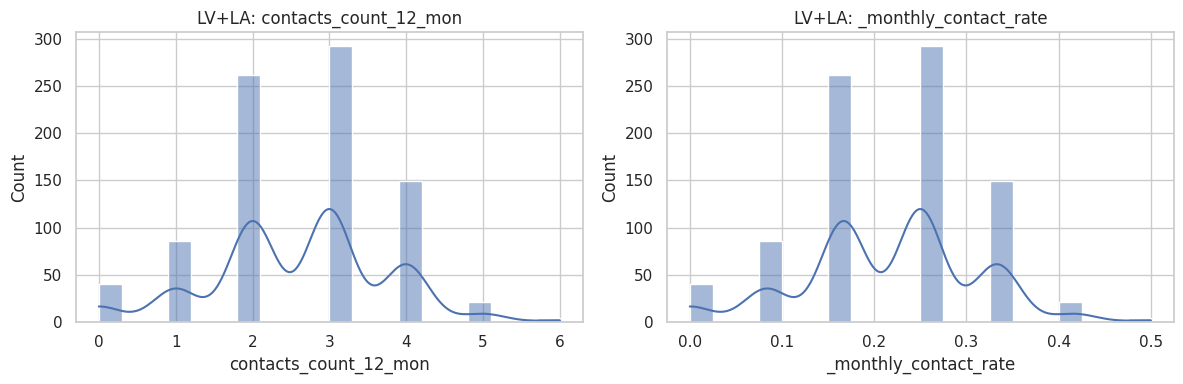

,flag_friction_signal,n,churn_rate,churn_rate_pct
0,0,387,0.315245,31.524548
1,1,466,0.493562,49.356223


기준 contacts_count_12_mon 75%: 3.0
기준 _monthly_contact_rate 75%: 0.25


In [88]:
# low + low 세그먼트 서비스 불만 신호가 있는가 ?
# 접촉 거의 없고 활동도 낮으면 무관심 자연이탈 쪽
# 접촉이 상대적으로 높은데 활동은 낮을 경우 불만 해지 문제 신호

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=lv_la, x='contacts_count_12_mon', bins=20, kde=True, ax=axes[0])
axes[0].set_title("LV+LA: contacts_count_12_mon")

sns.histplot(data=lv_la, x='_monthly_contact_rate', bins=20, kde=True, ax=axes[1])
axes[1].set_title("LV+LA: _monthly_contact_rate")

plt.tight_layout()
plt.show()

# 기준(분위): 상위 75% 이상이면 friction 후보로 가정
thr_contacts = lv_la['contacts_count_12_mon'].quantile(0.75)
thr_mcr = lv_la['_monthly_contact_rate'].quantile(0.75)

lv_la['flag_friction_signal'] = np.where(
    (lv_la['contacts_count_12_mon'] >= thr_contacts) |
    (lv_la['_monthly_contact_rate'] >= thr_mcr),
    1, 0
)

friction_summary = (
    lv_la.groupby('flag_friction_signal')
         .agg(
             n=('attrition_flag', 'count'),
             churn_rate=('attrition_flag', 'mean')
         )
         .assign(churn_rate_pct=lambda x: x['churn_rate']*100)
         .reset_index()
)

display(friction_summary)
print("기준 contacts_count_12_mon 75%:", thr_contacts)
print("기준 _monthly_contact_rate 75%:", thr_mcr)

Low Value + Low Activity 세그먼트 내에서도
고객 접촉 패턴에 따라 이탈 성격이 명확히 구분되었다.

접촉이 거의 없는 고객군의 이탈률은 약 31%로
자연 이탈에 가까운 양상을 보인 반면,
접촉 빈도가 상대적으로 높은 고객군에서는
이탈률이 약 49%까지 상승하였다.

이는 해당 세그먼트 내 일부 고객의 이탈이
단순한 무관심이 아니라 불만·문제 발생 이후의
사후적 반응일 가능성을 시사한다.

In [89]:
# 잔존가치 : 잔액도 남아 있고 관계도 남아 있는 고객들과 아닌 고객들 차이는?

lv_la['flag_residual_value'] = np.where(
    (lv_la['total_revolving_bal'] > 0) &
    (lv_la['total_relationship_count'] >= 2),
    1, 0
)

residual_summary = (
    lv_la.groupby('flag_residual_value')
         .agg(
             n=('attrition_flag', 'count'),
             churn_rate=('attrition_flag', 'mean')
         )
         .assign(churn_rate_pct=lambda x: x['churn_rate'] * 100)
         .reset_index()
)

residual_summary['group'] = residual_summary['flag_residual_value'].map({
    0: 'No Residual Value',
    1: 'Residual Value Exists'
})

display(residual_summary[['group', 'n', 'churn_rate_pct']])

,group,n,churn_rate_pct
0,No Residual Value,331,70.996979
1,Residual Value Exists,522,22.413793


LV+LA 세그먼트의 다수는 자연 이탈 고객이나,
잔존가치가 존재하는 하위 집단에서는
이탈률이 현저히 낮게 나타났다.

이는 해당 고객군이 비용 대비 유지 가능성이 있는
예외적 관리 대상임을 시사한다.

,residual,friction,n,churn_rate_pct
0,No Residual,No Friction,140,61.428571
1,No Residual,Friction Signal,191,78.010471
2,Residual Exists,No Friction,247,14.574899
3,Residual Exists,Friction Signal,275,29.454545


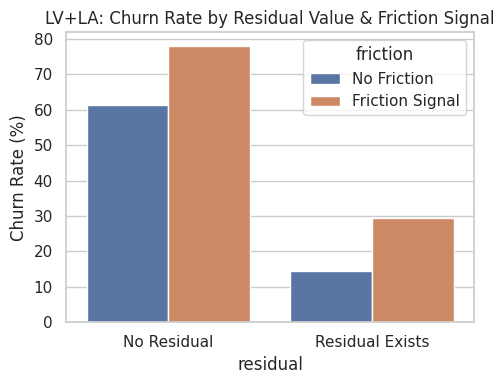

In [90]:
# 마찰신호  + 잔존가치

residual_friction_summary = (
    lv_la.groupby(['flag_residual_value', 'flag_friction_signal'])
         .agg(
             n=('attrition_flag', 'count'),
             churn_rate=('attrition_flag', 'mean')
         )
         .assign(churn_rate_pct=lambda x: x['churn_rate'] * 100)
         .reset_index()
)

residual_friction_summary['residual'] = residual_friction_summary['flag_residual_value'].map({
    0: 'No Residual',
    1: 'Residual Exists'
})
residual_friction_summary['friction'] = residual_friction_summary['flag_friction_signal'].map({
    0: 'No Friction',
    1: 'Friction Signal'
})

display(
    residual_friction_summary[
        ['residual', 'friction', 'n', 'churn_rate_pct']
    ]
)



plt.figure(figsize=(5,4))
sns.barplot(
    data=residual_friction_summary,
    x='residual',
    y='churn_rate_pct',
    hue='friction'
)
plt.title('LV+LA: Churn Rate by Residual Value & Friction Signal')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()


df['flag_lvla_residual'] = np.where(
    (df['segment'] == 'Low Value + Low Activity') &
    (df['total_revolving_bal'] > 0) &
    (df['total_relationship_count'] >= 2),
    1,
    0
)

df['flag_lalv_no_residual'] = np.where(
    (df['segment'] == 'Low Value + Low Activity') &
    (
        (df['total_revolving_bal'] <= 0) |
        (df['total_relationship_count'] < 2)
    ),
    1,
    0
)

해석

1. 잔존가치 없는 그룹은 마찰 여부와 상관없이 절반이상의 이탈률을 보입니다.
2. 이에 비해 잔존가치가 있는 그룹은 마찰 여부와 상관없이 낮은 편입니다
3. 잔존가치가 있으면서 마찰신호가 있는 그룹의 이탈률은 약 30%에 달합니다.

종합

    마찰신호는 원인 보다는 증복기 즉 이탈을 가속하는 요인으로 해석되며,
    해당 그룹 고객에서 잔존가치의 부재는 이탈의 중요한 요인으로 볼 수 있습니다.

# ⒋ general 세그먼트

general 고객군의 경우 잠재적 이탈군이 존재한 그룹으로
위험군 전이 구간을 확인했습니다.

In [91]:
# 언제 줄기 시작했는지 (최근 활동량 감소 확인)
# 얼마나 안쓰고 있는지 (활동 상태 확인)
# 마찰 신호가 있는지 (마찰 신호 확인) -- 이탈 가속 신호

g = df[df['segment'] == 'General'].copy()

def churn_by_quantile(df, col, q=5):
    tmp = df.copy()
    tmp['bin'] = pd.qcut(tmp[col], q=q, duplicates='drop')

    summary = (
        tmp.groupby('bin')
           .agg(
               n=('attrition_flag', 'count'),
               churn_rate=('attrition_flag', 'mean')
           )
           .assign(churn_rate_pct=lambda x: x['churn_rate'] * 100)
           .reset_index()
    )
    return summary


# 1️⃣ 최근 거래 감소 (Activity Drop)
ct_chng_summary = churn_by_quantile(g, 'total_ct_chng_q4_q1')

print("📉 [General] total_ct_chng_q4_q1 (최근 거래 변화율)\n")
display(ct_chng_summary)


# 2️⃣ 절대적 활동 수준
avg_txn_summary = churn_by_quantile(g, '_avg_monthly_txn_ct')

print("\n📊 [General] _avg_monthly_txn_ct (월평균 거래 빈도)\n")
display(avg_txn_summary)


# 3️⃣ 접촉 비율 (Friction Signal)
contact_summary = churn_by_quantile(g, '_monthly_contact_rate')

print("\n☎️ [General] _monthly_contact_rate (월 접촉 비율)\n")
display(contact_summary)

# 4️⃣ 관계 수 (Relationship Count)
rel_cnt_summary = churn_by_quantile(g, 'total_relationship_count')

print("\n🔗 [General] total_relationship_count (관계 수)\n")
display(rel_cnt_summary)


# 5️⃣ 관계 강도 (Relationship Intensity)
rel_int_summary = churn_by_quantile(g, '_relationship_intensity')

print("\n🔗 [General] _relationship_intensity (관계 강도)\n")
display(rel_int_summary)

📉 [General] total_ct_chng_q4_q1 (최근 거래 변화율)



,bin,n,churn_rate,churn_rate_pct
0,"(-0.001, 0.562]",1801,0.352582,35.258190
1,"(0.562, 0.667]",1874,0.107791,10.779082
2,"(0.667, 0.75]",1727,0.070064,7.006369
3,"(0.75, 0.857]",1762,0.074347,7.434733
4,"(0.857, 3.714]",1738,0.071346,7.134638



📊 [General] _avg_monthly_txn_ct (월평균 거래 빈도)



,bin,n,churn_rate,churn_rate_pct
0,"(0.188, 1.275]",1781,0.329029,32.902864
1,"(1.275, 1.735]",1781,0.195396,19.539585
2,"(1.735, 2.083]",1780,0.076966,7.696629
3,"(2.083, 2.545]",1784,0.043722,4.372197
4,"(2.545, 9.769]",1776,0.036036,3.603604



☎️ [General] _monthly_contact_rate (월 접촉 비율)



,bin,n,churn_rate,churn_rate_pct
0,"(-0.001, 0.167]",4549,0.083535,8.353484
1,"(0.167, 0.25]",2959,0.172356,17.235553
2,"(0.25, 0.5]",1394,0.231707,23.170732



🔗 [General] total_relationship_count (관계 수)



,bin,n,churn_rate,churn_rate_pct
0,"(0.999, 2.0]",1889,0.239809,23.980942
1,"(2.0, 3.0]",1994,0.135908,13.590772
2,"(3.0, 4.0]",1702,0.100470,10.047004
3,"(4.0, 5.0]",1675,0.100299,10.029851
4,"(5.0, 6.0]",1642,0.091352,9.135201



🔗 [General] _relationship_intensity (관계 강도)



,bin,n,churn_rate,churn_rate_pct
0,"(0.0169, 0.0625]",1783,0.236119,23.611890
1,"(0.0625, 0.0909]",1785,0.132773,13.277311
2,"(0.0909, 0.121]",1795,0.113092,11.309192
3,"(0.121, 0.158]",1759,0.106310,10.631040
4,"(0.158, 0.462]",1780,0.092697,9.269663


1. 최근 거래 변화율이 < 0.56 구간에서 이탈률이 약 3-5배 수준으로 급등

2. 월평균 거래 빈도 < 1.3 일때 이탈률이 급증하며 1.3- 1.7은 위험 상승구간이며 1.7이상일 때 안정구간에 속합니다.

3. 월 접촉 비율이 0.17 이상일 때 이탈률이 상승하기 시작하며 0.25 구간에서 급증

4. 관계 수가 2 미만일 경우 이탈률이 가장 높으며 관계 수가 증가할수록 이탈률이 감소하며 안정화 구간은 3이상입니다.



#데이터저장

In [92]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,flag_high_credit_limit,flag_new_customer,flag_high_inactive,flag_high_active,flag_high_contact,flag_no_contact,flag_low_open_to_buy,flag_high_open_to_buy,flag_amt_drop,flag_amt_spike,flag_no_chng,flag_low_spender,flag_high_spender,flag_low_trans,flag_high_trans,flag_ct_drop,flag_ct_spike,flag_ct_zero,flag_low_util,flag_high_util,util_z,trans_ct_z,amt_z,_risk_score,_monthly_contact_rate,_inactive_ratio_12m,_relationship_intensity,_avg_monthly_txn_ct,education_level_encoded,is_edu_unknown,income_category_encoded,is_income_unknown,is_married,is_single,is_divorced,is_marital_unknown,card_gold,card_platinum,card_silver,age_bin,segment,flag_HV_LA,flag_lvla_residual,flag_lalv_no_residual
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,-0.775882,-0.973895,-0.959707,1.157720,0.250000,0.083333,0.128205,1.076923,1.0,False,2.0,False,True,False,False,False,False,False,False,"(40, 50]",General,0,0,0
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,-0.616276,-1.357340,-0.916433,1.657497,0.166667,0.083333,0.136364,0.750000,3.0,False,0.0,False,False,True,False,False,False,False,False,"(40, 50]",General,0,0,0
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.997155,-1.911206,-0.740982,1.655032,0.000000,0.083333,0.111111,0.555556,3.0,False,3.0,False,True,False,False,False,False,False,False,"(50, 60]",General,0,0,0
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1.759686,-1.911206,-0.951758,4.622650,0.083333,0.333333,0.088235,0.588235,1.0,False,0.0,False,False,False,False,True,False,False,False,"(30, 40]",General,0,0,0
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,-0.997155,-1.570365,-1.056263,1.629474,0.000000,0.083333,0.238095,1.333333,0.0,False,2.0,False,True,False,False,False,False,False,False,"(30, 40]",General,0,0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  int64   
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  object  
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  object  
 5   marital_status            10127 non-null  object  
 6   income_category           10127 non-null  object  
 7   card_category             10127 non-null  object  
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

In [94]:
df.to_csv('/content/drive/MyDrive/week_hands_on_project5/bank_churn/dataset/bankchurn_eda.csv',index=False)